In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
raw_seq = pd.read_csv("/content/drive/My Drive/Ontario_Confirmed_Cases.csv")

In [0]:
raw_seq = raw_seq.rename(columns={'Confirmed deaths': 'Ontario Deaths', \
                                  'Confirmed Recovered': 'Ontario Recovered'})

In [4]:
raw = raw_seq.iloc[4:]

raw.head()

,Dates,Confirmed Cases,Ontario Deaths,Ontario Recovered
4,01/26/2020,1,0,0
5,01/27/2020,1,0,0
6,01/28/2020,1,0,0
7,01/29/2020,1,0,0
8,01/30/2020,1,0,0


In [0]:
ontario_confirmed_cases = raw_seq['Confirmed Cases']
ontario_deaths = raw_seq['Ontario Deaths']
ontario_recovered = raw_seq['Ontario Recovered']

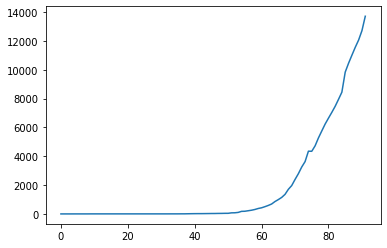

In [6]:
raw_seq['Confirmed Cases'].plot()

In [7]:
# univariate cnn example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(ontario_confirmed_cases, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(ontario_confirmed_cases)
pred_val = []
for i in range(x):
  i=ontario_confirmed_cases[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

Using TensorFlow backend.


1/1 [==============================] - 0s 14ms/step
[[1.6846337]]
1/1 [==============================] - 0s 1ms/step
[[1.6846337]]
1/1 [==============================] - 0s 691us/step
[[1.6846337]]
1/1 [==============================] - 0s 3ms/step
[[1.6846337]]
1/1 [==============================] - 0s 1ms/step
[[3.2129211]]
1/1 [==============================] - 0s 2ms/step
[[3.2129211]]
1/1 [==============================] - 0s 1ms/step
[[3.2129211]]
1/1 [==============================] - 0s 1ms/step
[[3.2129211]]
1/1 [==============================] - 0s 1ms/step
[[3.2129211]]
1/1 [==============================] - 0s 991us/step
[[5.4685802]]
1/1 [==============================] - 0s 704us/step
[[5.4685802]]
1/1 [==============================] - 0s 732us/step
[[5.4685802]]
1/1 [==============================] - 0s 890us/step
[[5.4685802]]
1/1 [==============================] - 0s 883us/step
[[5.4685802]]
1/1 [==============================] - 0s 688us/step
[[5.4685802]]
1/1 [=====

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Cases']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t1 = raw_seq


In [9]:
print(t1)

         Dates  Confirmed Cases  ...  Ontario Recovered  Predicted Cases
0   01/22/2020                0  ...                  0         1.684634
1   01/23/2020                0  ...                  0         1.684634
2   01/24/2020                0  ...                  0         1.684634
3   01/25/2020                0  ...                  0         1.684634
4   01/26/2020                1  ...                  0         3.212921
..         ...              ...  ...                ...              ...
87  04/18/2020            11013  ...              10964     11733.942383
88  04/19/2020            11561  ...              11847     12316.936523
89  04/20/2020            12063  ...              12543     12850.992188
90  04/21/2020            12715  ...              13188     13544.626953
91  04/22/2020            13718  ...              14454     14611.676758

[92 rows x 5 columns]


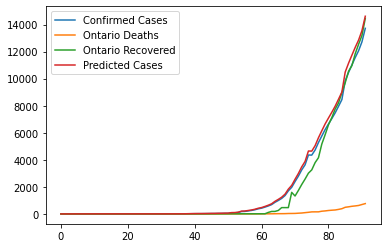

In [10]:
t1.plot()

In [11]:
# Ontario Deaths
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(ontario_deaths, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(ontario_deaths)
pred_val = []
for i in range(x):
  i=ontario_deaths[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[2.0351634]]
1/1 [==============================] - 0s 4ms/step
[[2.0351634]]
1/1 [==============================] - 0s 922us/step
[[2.0351634]]
1/1 [==============================] - 0s 3ms/step
[[2.0351634]]
1/1 [==============================] - 0s 2ms/step
[[2.0351634]]
1/1 [==============================] - 0s 2ms/step
[[2.0351634]]
1/1 [==============================] - 0s 2ms/step
[[2.0351634]]
1/1 [==============================] - 0s 2ms/step
[[2.0351634]]
1/1 [==============================] - 0s 2ms/step
[[2.0351634]]
1/1 [==============================] - 0s 2ms/step
[[2.0351634]]
1/1 [==============================] - 0s 2ms/step
[[2.0351634]]
1/1 [==============================] - 0s 631us/step
[[2.0351634]]
1/1 [==============================] - 0s 3ms/step
[[2.0351634]]
1/1 [==============================] - 0s 1ms/step
[[2.0351634]]
1/1 [==============================] - 0s 1ms/step
[[2.0351634]]
1/1 [===============

In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Deaths']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t2 = raw_seq

In [13]:
print(t2)

         Dates  Confirmed Cases  ...  Predicted Cases  Predicted Deaths
0   01/22/2020                0  ...         1.684634          2.035163
1   01/23/2020                0  ...         1.684634          2.035163
2   01/24/2020                0  ...         1.684634          2.035163
3   01/25/2020                0  ...         1.684634          2.035163
4   01/26/2020                1  ...         3.212921          2.035163
..         ...              ...  ...              ...               ...
87  04/18/2020            11013  ...     11733.942383        616.165710
88  04/19/2020            11561  ...     12316.936523        645.297729
89  04/20/2020            12063  ...     12850.992188        680.903625
90  04/21/2020            12715  ...     13544.626953        756.431152
91  04/22/2020            13718  ...     14611.676758        829.800659

[92 rows x 6 columns]


In [14]:
t2.tail(10)

,Dates,Confirmed Cases,Ontario Deaths,Ontario Recovered,Predicted Cases,Predicted Deaths
82,04/13/2020,7470,291,7758,7964.695312,321.608398
83,04/14/2020,7953,334,8210,8478.539062,368.003845
84,04/15/2020,8447,385,8966,9004.083984,423.031097
85,04/16/2020,9840,490,9698,10486.037109,536.322327
86,04/17/2020,10456,524,10545,11141.372070,573.007080
87,04/18/2020,11013,564,10964,11733.942383,616.165710
88,04/19/2020,11561,591,11847,12316.936523,645.297729
89,04/20/2020,12063,624,12543,12850.992188,680.903625
90,04/21/2020,12715,694,13188,13544.626953,756.431152
91,04/22/2020,13718,762,14454,14611.676758,829.800659


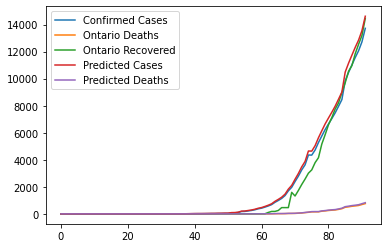

In [15]:
t2.plot()

In [16]:
# India Recovered
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#raw_seq = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(ontario_recovered, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(ontario_recovered)
pred_val = []
for i in range(x):
  i=ontario_recovered[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 11ms/step
[[3.5203722]]
1/1 [==============================] - 0s 1ms/step
[[3.5203722]]
1/1 [==============================] - 0s 584us/step
[[3.5203722]]
1/1 [==============================] - 0s 1ms/step
[[3.5203722]]
1/1 [==============================] - 0s 572us/step
[[3.5203722]]
1/1 [==============================] - 0s 597us/step
[[3.5203722]]
1/1 [==============================] - 0s 848us/step
[[3.5203722]]
1/1 [==============================] - 0s 557us/step
[[3.5203722]]
1/1 [==============================] - 0s 628us/step
[[3.5203722]]
1/1 [==============================] - 0s 518us/step
[[3.5203722]]
1/1 [==============================] - 0s 576us/step
[[3.5203722]]
1/1 [==============================] - 0s 579us/step
[[3.5203722]]
1/1 [==============================] - 0s 550us/step
[[3.5203722]]
1/1 [==============================] - 0s 530us/step
[[3.5203722]]
1/1 [==============================] - 0s 568us/step
[[3.5203722]]


In [0]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Recovered']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_confirmed_cases)
raw_seq = raw_seq.join(Predict_cases)
raw_seq
t3 = raw_seq

In [18]:
print(t3)

         Dates  Confirmed Cases  ...  Predicted Deaths  Predicted Recovered
0   01/22/2020                0  ...          2.035163             3.520372
1   01/23/2020                0  ...          2.035163             3.520372
2   01/24/2020                0  ...          2.035163             3.520372
3   01/25/2020                0  ...          2.035163             3.520372
4   01/26/2020                1  ...          2.035163             3.520372
..         ...              ...  ...               ...                  ...
87  04/18/2020            11013  ...        616.165710         12024.169922
88  04/19/2020            11561  ...        645.297729         12991.013672
89  04/20/2020            12063  ...        680.903625         13753.099609
90  04/21/2020            12715  ...        756.431152         14459.341797
91  04/22/2020            13718  ...        829.800659         15845.551758

[92 rows x 7 columns]


In [19]:
t3.tail(10)

,Dates,Confirmed Cases,Ontario Deaths,Ontario Recovered,Predicted Cases,Predicted Deaths,Predicted Recovered
82,04/13/2020,7470,291,7758,7964.695312,321.608398,8513.755859
83,04/14/2020,7953,334,8210,8478.539062,368.003845,9008.673828
84,04/15/2020,8447,385,8966,9004.083984,423.031097,9836.457031
85,04/16/2020,9840,490,9698,10486.037109,536.322327,10637.962891
86,04/17/2020,10456,524,10545,11141.372070,573.007080,11565.385742
87,04/18/2020,11013,564,10964,11733.942383,616.165710,12024.169922
88,04/19/2020,11561,591,11847,12316.936523,645.297729,12991.013672
89,04/20/2020,12063,624,12543,12850.992188,680.903625,13753.099609
90,04/21/2020,12715,694,13188,13544.626953,756.431152,14459.341797
91,04/22/2020,13718,762,14454,14611.676758,829.800659,15845.551758


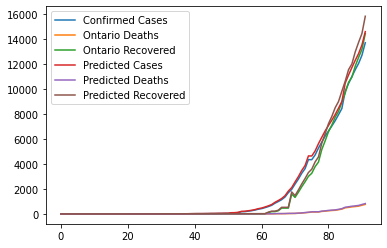

In [20]:
t3.plot()

In [0]:
t3.to_csv (r'/content/drive/My Drive/ontario_og_preds.csv', index = False, header=True)

In [22]:
'''errors= abs(Total_cases['Prediction'] - raw['India Confirmed Cases'])
mape= np.mean(100*(errors/confirmed_cases))
Accuracy=100-mape
Accuracy'''

"errors= abs(Total_cases['Prediction'] - raw['India Confirmed Cases'])\nmape= np.mean(100*(errors/confirmed_cases))\nAccuracy=100-mape\nAccuracy"

In [23]:
pd.set_option('display.max_rows', t3.shape[0]+1)
print(t3)

         Dates  Confirmed Cases  ...  Predicted Deaths  Predicted Recovered
0   01/22/2020                0  ...          2.035163             3.520372
1   01/23/2020                0  ...          2.035163             3.520372
2   01/24/2020                0  ...          2.035163             3.520372
3   01/25/2020                0  ...          2.035163             3.520372
4   01/26/2020                1  ...          2.035163             3.520372
5   01/27/2020                1  ...          2.035163             3.520372
6   01/28/2020                1  ...          2.035163             3.520372
7   01/29/2020                1  ...          2.035163             3.520372
8   01/30/2020                1  ...          2.035163             3.520372
9   01/31/2020                3  ...          2.035163             3.520372
10  02/01/2020                3  ...          2.035163             3.520372
11  02/02/2020                3  ...          2.035163             3.520372
12  02/03/20

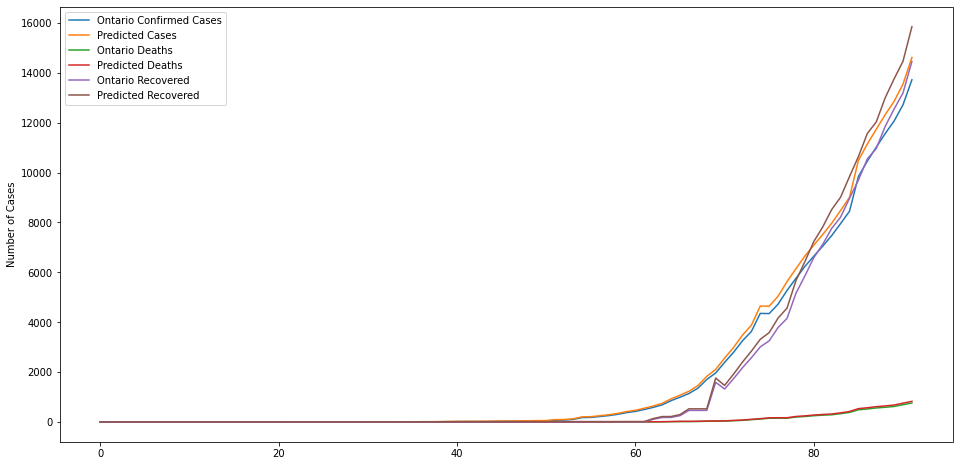

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['Confirmed Cases'])
plt.plot(t3['Predicted Cases'])
plt.plot(t3['Ontario Deaths'])
plt.plot(t3['Predicted Deaths'])
plt.plot(t3['Ontario Recovered'])
plt.plot(t3['Predicted Recovered'])
plt.legend(['Ontario Confirmed Cases', 'Predicted Cases', 'Ontario Deaths', 'Predicted Deaths', 'Ontario Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

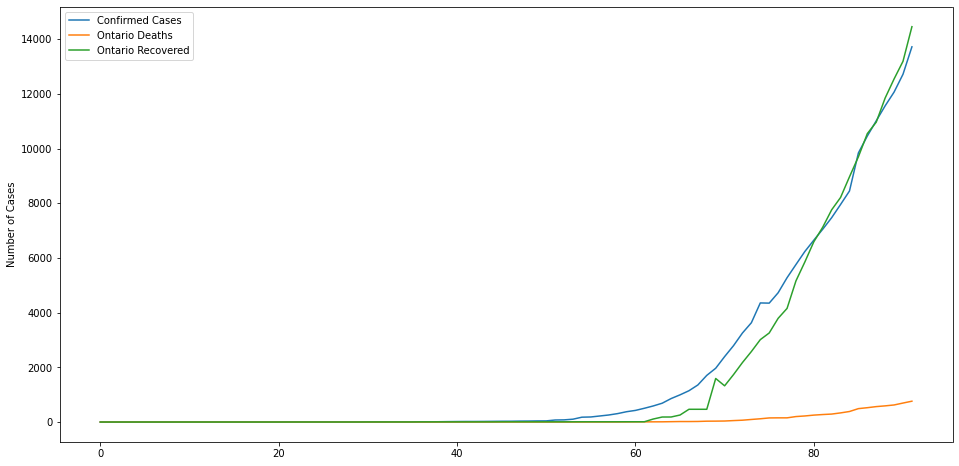

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
plt.plot(t3['Confirmed Cases'])
#plt.plot(raw_seq['Predicted Cases'])
plt.plot(t3['Ontario Deaths'])#plt.plot(raw_seq['Predicted Deaths'])
plt.plot(t3['Ontario Recovered'])
#plt.plot(raw_seq['Predicted Recovered'])
plt.legend(['Confirmed Cases', 'Ontario Deaths', 'Ontario Recovered'], loc='upper left')
plt.show()

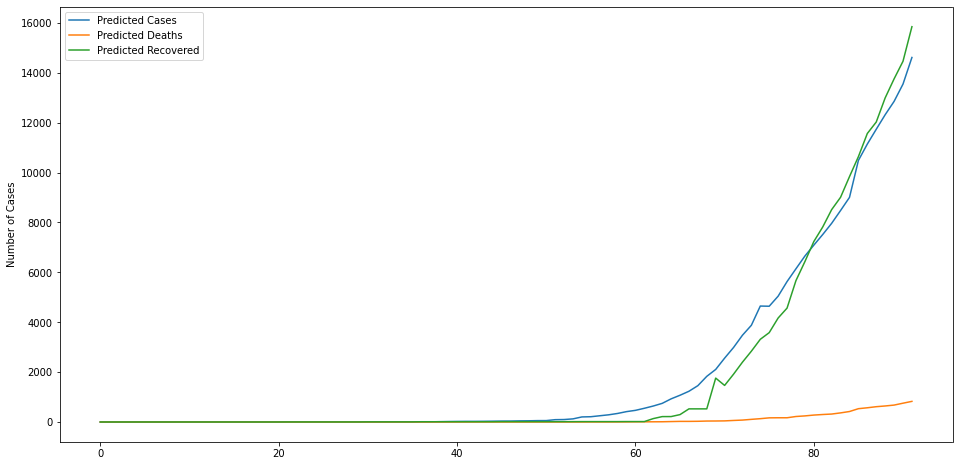

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
#plt.plot(raw_seq['India Confirmed Cases'])
plt.plot(t3['Predicted Cases'])
#plt.plot(raw_seq['India Deaths'])
plt.plot(t3['Predicted Deaths'])
#plt.plot(raw_seq['India Recovered'])
plt.plot(t3['Predicted Recovered'])
plt.legend(['Predicted Cases', 'Predicted Deaths', 'Predicted Recovered'], loc='upper left')
plt.show()

In [0]:
newplot = t3.iloc[52:62]

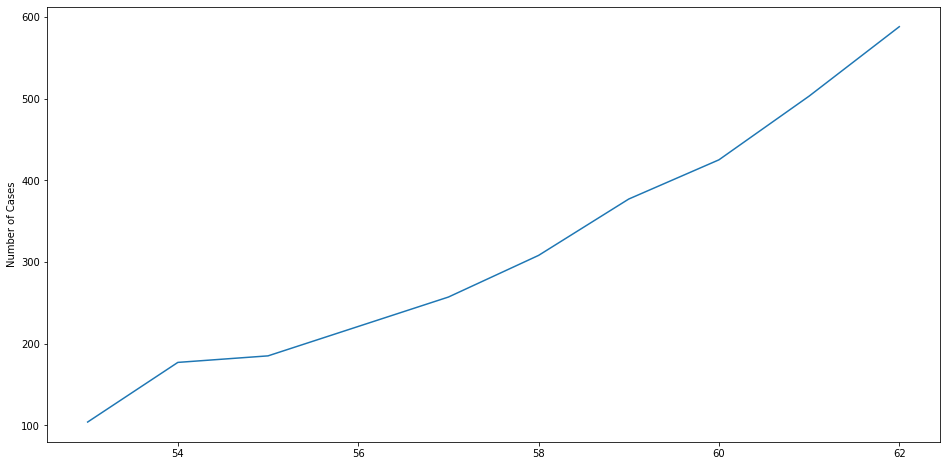

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
newplot = t3['Confirmed Cases'].iloc[53:63]
plt.plot(newplot)
#plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

In [29]:
newplot

53    104
54    177
55    185
56    221
57    257
58    308
59    377
60    425
61    503
62    588
Name: Confirmed Cases, dtype: int64

In [30]:
dates = t3['Dates'].iloc[53:63]
dates
newplot2 = pd.DataFrame(newplot.to_frame().join(dates))
newplot2
#newplot2.info()

,Confirmed Cases,Dates
53,104,03/15/2020
54,177,03/16/2020
55,185,03/17/2020
56,221,03/18/2020
57,257,03/19/2020
58,308,03/20/2020
59,377,03/21/2020
60,425,03/22/2020
61,503,03/23/2020
62,588,03/24/2020


In [0]:
newplot2.set_index('Dates', inplace=True)

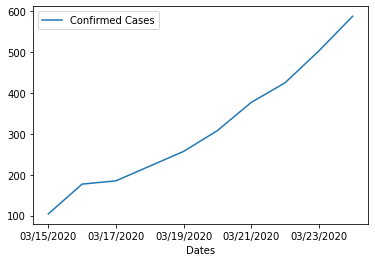

In [32]:
newplot2.plot()

In [33]:
percent_rise = (newplot2['Confirmed Cases'][9] - newplot2['Confirmed Cases'][0]) / newplot2['Confirmed Cases'][9] 
percent_rise
total_rise = percent_rise * 100
total_rise

82.31292517006803

In [0]:
postplot = t3.iloc[63:73]

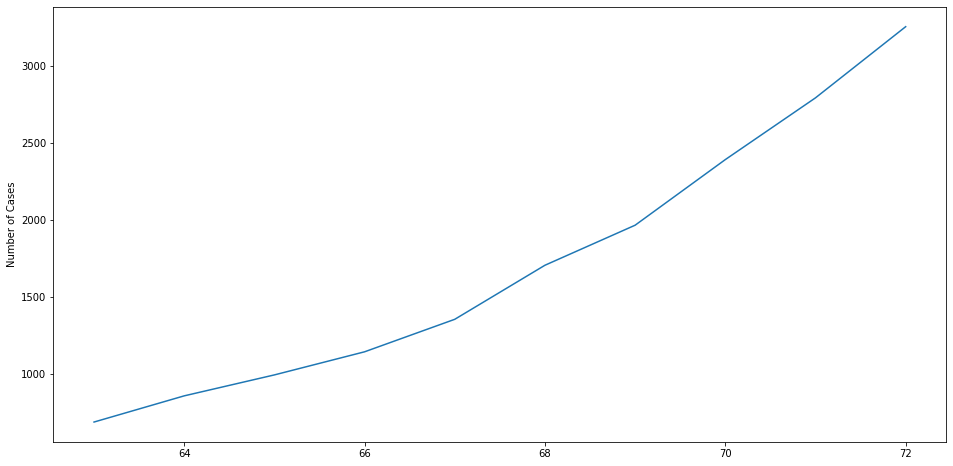

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
postplot = t3['Confirmed Cases'].iloc[63:73]
plt.plot(postplot)
#plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

In [36]:
dates2 = t3['Dates'].iloc[63:73]
dates2
postplot2 = pd.DataFrame(postplot.to_frame().join(dates2))
postplot2.set_index('Dates', inplace=True)
postplot2
#newplot2.info()

,Confirmed Cases
Dates,
03/25/2020,688
03/26/2020,858
03/27/2020,994
03/28/2020,1144
03/29/2020,1355
03/30/2020,1706
03/31/2020,1966
04/01/2020,2392
04/02/2020,2793


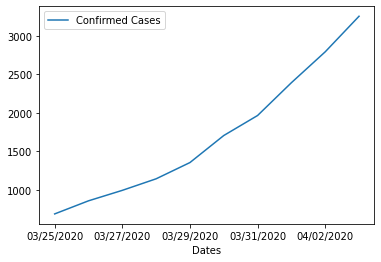

In [37]:
postplot2.plot()

In [38]:
percent_rise2 = (postplot2['Confirmed Cases'][9] - postplot2['Confirmed Cases'][0]) / postplot2['Confirmed Cases'][9] 
percent_rise2
total_rise2 = percent_rise2 * 100
total_rise2


78.86328725038403

In [39]:
confirmed_cases_beforelockdown = total_rise
confirmed_cases_afterlockdown = total_rise2
prevented_cases = (newplot2['Confirmed Cases'][9] - newplot2['Confirmed Cases'][0])

if confirmed_cases_beforelockdown < confirmed_cases_afterlockdown:
   print("%s percent rise is greater than   %s percent rise" % (confirmed_cases_afterlockdown, confirmed_cases_beforelockdown))
else:
   print("%s percent rise is smaller than  %s percent rise" % (confirmed_cases_afterlockdown, confirmed_cases_beforelockdown))
  
print("The preferred Lockdown date to avoid more casualities would be 15th March")
print("Number of cases that could have been prevented: %s" % (prevented_cases))

78.86328725038403 percent rise is smaller than  82.31292517006803 percent rise
The preferred Lockdown date to avoid more casualities would be 15th March
Number of cases that could have been prevented: 484


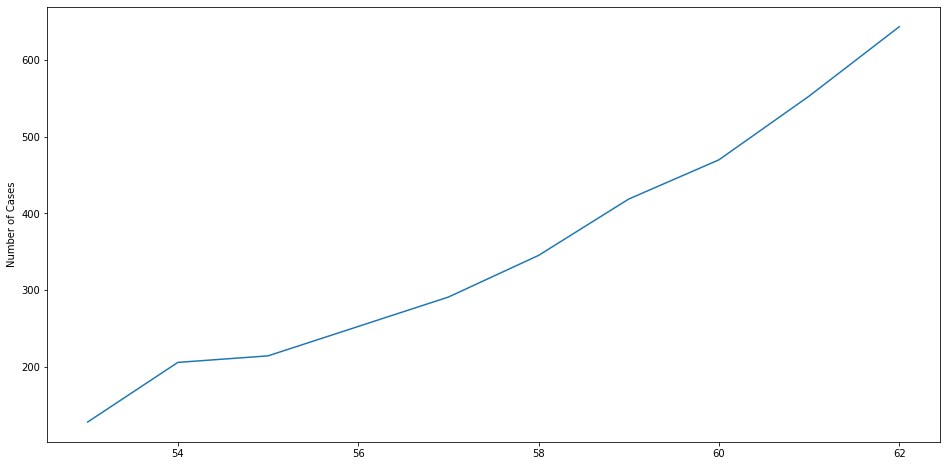

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
predictplot = t3['Predicted Cases']
predictplot = predictplot.iloc[53:63]
plt.plot(predictplot)
#plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

In [41]:
postdates = t3['Dates'].iloc[53:63]
postdates
#newplot2.info()

53    03/15/2020
54    03/16/2020
55    03/17/2020
56    03/18/2020
57    03/19/2020
58    03/20/2020
59    03/21/2020
60    03/22/2020
61    03/23/2020
62    03/24/2020
Name: Dates, dtype: object

In [42]:
predplot2 = pd.DataFrame(predictplot.to_frame().join(postdates))
predplot2.set_index('Dates', inplace=True)
predplot2

,Predicted Cases
Dates,
03/15/2020,128.323166
03/16/2020,205.984756
03/17/2020,214.495590
03/18/2020,252.794434
03/19/2020,291.093323
03/20/2020,345.350006
03/21/2020,418.756165
03/22/2020,469.821320
03/23/2020,552.802246


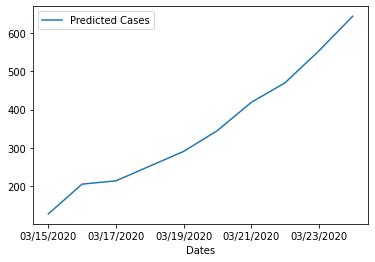

In [43]:
predplot2.plot()

In [44]:
prediction_percent = (predplot2['Predicted Cases'][9] - predplot2['Predicted Cases'][0]) / predplot2['Predicted Cases'][9] 
prediction_percent
prediction_rise = prediction_percent * 100
prediction_rise

80.05018830299377

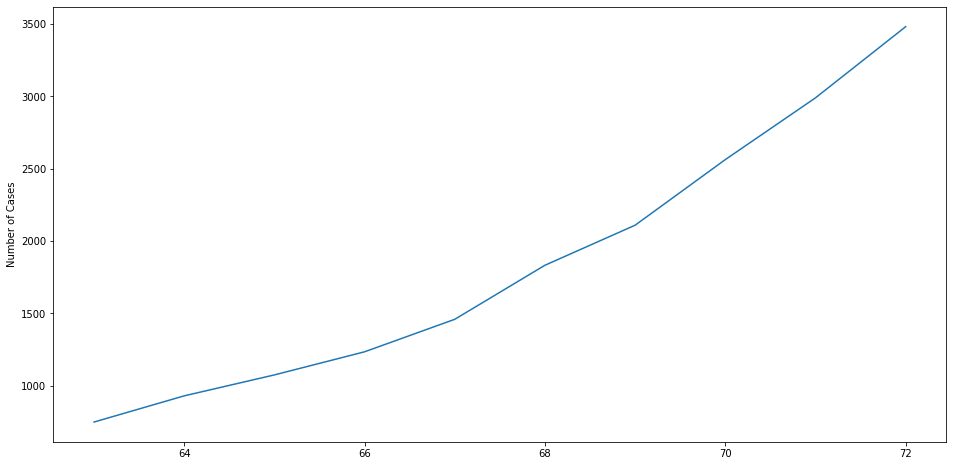

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.ylabel("Number of Cases")
predictplot_afterlock = t3['Predicted Cases']
predictplot_afterlock = predictplot_afterlock.iloc[63:73]
plt.plot(predictplot_afterlock)
#plt.legend(['India Confirmed Cases', 'Predicted Cases', 'India Deaths', 'Predicted Deaths', 'India Recovered', 'Predicted Recovered'], loc='upper left')
plt.show()

In [46]:
postdates_afterlock = t3['Dates'].iloc[63:73]
postdates_afterlock
#newplot2.info()

63    03/25/2020
64    03/26/2020
65    03/27/2020
66    03/28/2020
67    03/29/2020
68    03/30/2020
69    03/31/2020
70    04/01/2020
71    04/02/2020
72    04/03/2020
Name: Dates, dtype: object

In [47]:
predplot3 = pd.DataFrame(predictplot_afterlock.to_frame().join(postdates_afterlock))
predplot3.set_index('Dates', inplace=True)
predplot3

,Predicted Cases
Dates,
03/25/2020,749.615845
03/26/2020,930.471497
03/27/2020,1075.156006
03/28/2020,1234.734619
03/29/2020,1459.208618
03/30/2020,1832.622437
03/31/2020,2109.225342
04/01/2020,2562.428467
04/02/2020,2989.035156


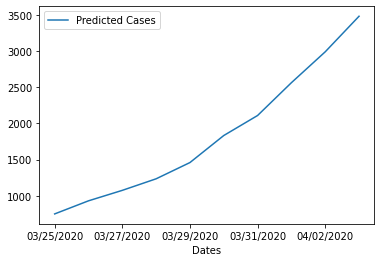

In [48]:
predplot3.plot()

In [49]:
predictplot_afterlock

63     749.615845
64     930.471497
65    1075.156006
66    1234.734619
67    1459.208618
68    1832.622437
69    2109.225342
70    2562.428467
71    2989.035156
72    3480.536865
Name: Predicted Cases, dtype: float32

In [50]:
prediction_percent_afterlock = (predplot3['Predicted Cases'][9] - predplot3['Predicted Cases'][0]) / predplot3['Predicted Cases'][9] 
prediction_percent_afterlock
prediction_rise_afterlock = prediction_percent_afterlock * 100
prediction_rise_afterlock

78.46263647079468

In [51]:
print("The percentage rise from 15th march to 25th march: %s " % (prediction_rise))
print("The percentage rise from 25th march to 3rd april: %s " % (prediction_rise_afterlock))

The percentage rise from 15th march to 25th march: 80.05018830299377 
The percentage rise from 25th march to 3rd april: 78.46263647079468 


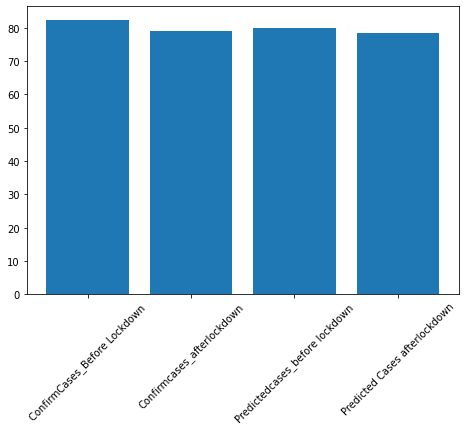

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cases = ['ConfirmCases_Before Lockdown', 'Confirmcases_afterlockdown', 'Predictedcases_before lockdown', 'Predicted Cases afterlockdown']
percent = [total_rise, total_rise2, prediction_rise, prediction_rise_afterlock]
ax.bar(cases,percent)
plt.xticks(rotation=45)
plt.show()

In [0]:
xc = newplot2['Confirmed Cases'][0]
xl=newplot2['Confirmed Cases'][9]

In [54]:
cv= total_rise2
cv

78.86328725038403

In [55]:
temp = (100 * xc) / (100 - cv)
Case_prevented= xl - temp
print("For Real Model:")
print('Total confirmed cases which could have been prevented if the lockdown started at 15th March:', Case_prevented)
print('The number of cases it would have been till 25th march if lockdown started on 15th march:', temp)

For Real Model:
Total confirmed cases which could have been prevented if the lockdown started at 15th March: 95.96511627906955
The number of cases it would have been till 25th march if lockdown started on 15th march: 492.03488372093045


Concluded Numbers for Prediction Scores

In [0]:
p1 = predplot2['Predicted Cases'][0]
p2 = predplot2['Predicted Cases'][9]

In [57]:
cv2 = prediction_rise
cv2

80.05018830299377

In [58]:
a = 100 * p1
b = 100 - cv2
temp2 = a / b
cases_prevented_prediction = p2 - temp2
print("For Prediciton model supporting our real-time theory:")
print("Total predicted cases which could have been prevented in the future if lockdown started at 15th March", cases_prevented_prediction)
print('The number of cases there would be on 25th march if lockdown started on 15th march:', temp2)

For Prediciton model supporting our real-time theory:
Total predicted cases which could have been prevented in the future if lockdown started at 15th March 1.999342612180044e-05
The number of cases there would be on 25th march if lockdown started on 15th march: 643.2299604753239


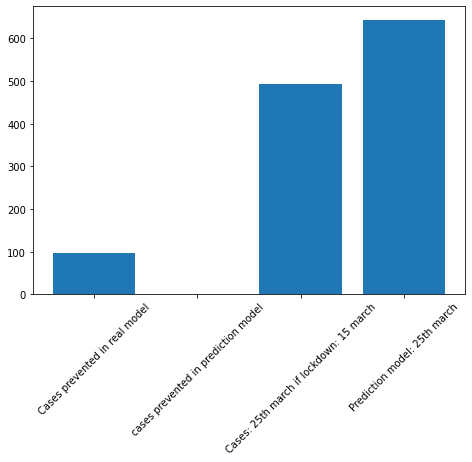

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cases = ['Cases prevented in real model', 'cases prevented in prediction model', 'Cases: 25th march if lockdown: 15 march', 'Prediction model: 25th march']
percent = [Case_prevented, cases_prevented_prediction, temp, temp2]
ax.bar(cases,percent)
plt.xticks(rotation=45)
plt.show()

In [61]:
from sklearn.metrics import r2_score
score = r2_score(t3['Confirmed Cases'], t3['Predicted Cases'])
score

0.9943611143477635

In [62]:
from sklearn.metrics import r2_score
score1 = r2_score(t3['Ontario Deaths'], t3['Predicted Deaths'])
score1

0.9886187123399178

In [63]:
from sklearn.metrics import r2_score
score3 = r2_score(t3['Ontario Recovered'], t3['Predicted Recovered'])
score3

0.9883557092429055

In [64]:
Average = (score + score1 + score3) / 3
Average

0.990445178643529